In [1]:
import pandas as pd
import matplotlib.pyplot as plt

We will be looking at data to compare how unemployment and the Covid pandemic are related

We will first start by importing one of the data sets and cleaning the data

In [183]:
employed = pd.read_excel("https://github.com/Xanitross/Covid_Effects_On_Jobs/blob/main/All_Employees_Thousands_NonFarm.xlsx?raw=true", skiprows=12)
employed

c:\Users\Xanit\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2013,135265,135544,135689,135876,136091,136269,136391.0,136635.0,136819.0,137039.0,137314.0,137368.0
1,2014,137552,137707,137986,138298,138501,138833,139076.0,139258.0,139563.0,139805.0,140089.0,140366.0
2,2015,140562,140829,140924,141202,141540,141695,141989.0,142130.0,142265.0,142585.0,142810.0,143083.0
3,2016,143198,143410,143666,143856,143901,144152,144515.0,144664.0,144961.0,145069.0,145189.0,145408.0
4,2017,145639,145845,145975,146172,146389,146588,146772.0,146907.0,146999.0,147147.0,147377.0,147521.0
5,2018,147670,148058,148281,148426,148755,148966,149022.0,149272.0,149361.0,149526.0,149622.0,149805.0
6,2019,150114,150092,150320,150563,150630,150797,150879.0,151111.0,151318.0,151447.0,151662.0,151764.0
7,2020,152098,152371,150944,130430,133055,137620,139064.0,140799.0,141760.0,142479.0,142743.0,142475.0
8,2021,142969,143544,144328,144614,145096,145789,146558.0,147221.0,147778.0,148559.0,149173.0,149742.0
9,2022,150106,151010,151424,151678,152042,152412,152980.0,153332.0,153682.0,154006.0,154296.0,154535.0


This data shows how many thousands of people are employed in non-farm jobs in the US by month and year. We're going to start cleaning this data by reorganizing the data to be read in all one column and then combining the month + year into one item. We'll start by melting the data-frame

In [184]:
employed = employed.melt("Year")
employed

,Year,variable,value
0,2013,Jan,135265.0
1,2014,Jan,137552.0
2,2015,Jan,140562.0
3,2016,Jan,143198.0
4,2017,Jan,145639.0
...,...,...,...
127,2019,Dec,151764.0
128,2020,Dec,142475.0
129,2021,Dec,149742.0
130,2022,Dec,154535.0


Next we'll combine the year & month into one new column.

In [185]:
employed["Year & Month"] = employed["Year"].astype(str) + " " + employed["variable"].astype(str)
employed["NumberEmployed"] = employed["value"]
employed.drop(["Year", "variable", "value"], axis=1, inplace=True)
employed

,Year & Month,NumberEmployed
0,2013 Jan,135265.0
1,2014 Jan,137552.0
2,2015 Jan,140562.0
3,2016 Jan,143198.0
4,2017 Jan,145639.0
...,...,...
127,2019 Dec,151764.0
128,2020 Dec,142475.0
129,2021 Dec,149742.0
130,2022 Dec,154535.0


Remove the blank rows

In [186]:
employed.dropna(inplace=True)
employed

,Year & Month,NumberEmployed
0,2013 Jan,135265.0
1,2014 Jan,137552.0
2,2015 Jan,140562.0
3,2016 Jan,143198.0
4,2017 Jan,145639.0
...,...,...
126,2018 Dec,149805.0
127,2019 Dec,151764.0
128,2020 Dec,142475.0
129,2021 Dec,149742.0


Now we need to re-sort the data as it is currently organized by year, when we want to look at this data month by month in order

In [187]:
employed["YYYY-mm"] = pd.to_datetime(employed["Year & Month"], format="%Y %b").dt.strftime("%Y-%m")
employed.sort_values("YYYY-mm", inplace=True)
employed.drop(["YYYY-mm"], axis=1, inplace=True)
employed

,Year & Month,NumberEmployed
0,2013 Jan,135265.0
11,2013 Feb,135544.0
22,2013 Mar,135689.0
33,2013 Apr,135876.0
44,2013 May,136091.0
...,...,...
21,2023 Feb,155255.0
32,2023 Mar,155472.0
43,2023 Apr,155689.0
54,2023 May,155995.0


We will now update the DF to make the Year and Month column into the index

In [188]:
employed.set_index(["Year & Month"], inplace=True)
employed

,NumberEmployed
Year & Month,
2013 Jan,135265.0
2013 Feb,135544.0
2013 Mar,135689.0
2013 Apr,135876.0
2013 May,136091.0
...,...
2023 Feb,155255.0
2023 Mar,155472.0
2023 Apr,155689.0


Update numbers to integers instead of floats

In [189]:
employed = employed.astype("int")
employed

,NumberEmployed
Year & Month,
2013 Jan,135265
2013 Feb,135544
2013 Mar,135689
2013 Apr,135876
2013 May,136091
...,...
2023 Feb,155255
2023 Mar,155472
2023 Apr,155689


Line graph to visualize the data

<Axes: xlabel='Year & Month'>

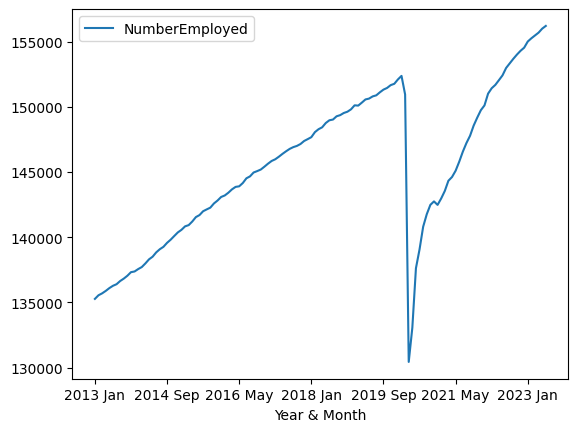

In [190]:
employed.plot.line()

Now let's look at trends in the data by comparing each of the values with how it has changed over the previous month

In [191]:
employed["previous"] = employed.NumberEmployed.shift(1)
employed["change"] = employed["NumberEmployed"] - employed["previous"]
employed.drop(["previous"], axis=1, inplace=True)
employed = employed.astype("Int64")
employed

,NumberEmployed,change
Year & Month,,
2013 Jan,135265,<NA>
2013 Feb,135544,279
2013 Mar,135689,145
2013 Apr,135876,187
2013 May,136091,215
...,...,...
2023 Feb,155255,248
2023 Mar,155472,217
2023 Apr,155689,217


Now let's look at the full data

In [192]:
print(employed.to_string())

              NumberEmployed  change
Year & Month                        
2013 Jan              135265    <NA>
2013 Feb              135544     279
2013 Mar              135689     145
2013 Apr              135876     187
2013 May              136091     215
2013 Jun              136269     178
2013 Jul              136391     122
2013 Aug              136635     244
2013 Sep              136819     184
2013 Oct              137039     220
2013 Nov              137314     275
2013 Dec              137368      54
2014 Jan              137552     184
2014 Feb              137707     155
2014 Mar              137986     279
2014 Apr              138298     312
2014 May              138501     203
2014 Jun              138833     332
2014 Jul              139076     243
2014 Aug              139258     182
2014 Sep              139563     305
2014 Oct              139805     242
2014 Nov              140089     284
2014 Dec              140366     277
2015 Jan              140562     196
2

In [193]:
employed.mean()

NumberEmployed    145397.325397
change               167.512000
dtype: float64

In [194]:
employed.median()

NumberEmployed    145714.0
change               232.0
dtype: float64

These numbers show that on average 167-232 thousand jobs are added each month under normal circumstances. If we look at the data from 2020 we can see that right before the sharp decline the peak number of jobs was 152,371 thousand (152,371,000) in Feb 2020, if we then look for the point when we again reach that number of jobs it does not happen until Jun 2022 when the number of jobs reached 152,412 thousand (152,412,000). This means it took 27 months to recover to the Feb 2020 point and it would reason that if Covid-19 had not occurred then those 27 months of growth would have led to a Jun 2022 total that was 4509-6264 thousand higher than the Feb 2020 peak.

<Axes: xlabel='Year & Month'>

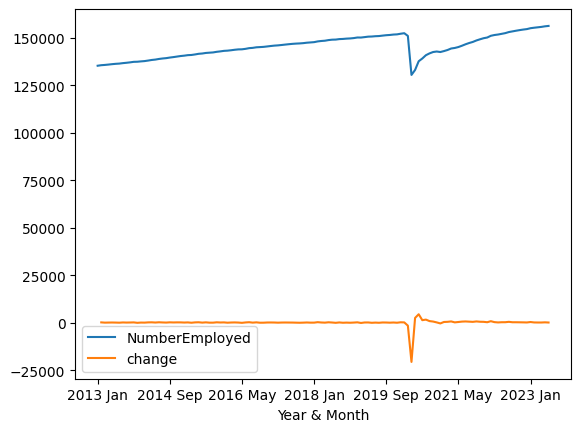

In [195]:
employed.plot.line()

Now let's look if there is anything else that could relate to this change

In [196]:
unemployment = pd.read_excel("https://github.com/Xanitross/Covid_Effects_On_Jobs/blob/main/Unemployment_Rate_Monthly.xlsx?raw=true", skiprows=11)
unemployment

c:\Users\Xanit\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
1,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
2,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
3,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
4,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1
5,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9
6,2019,4.0,3.8,3.8,3.6,3.7,3.6,3.7,3.7,3.5,3.6,3.6,3.6
7,2020,3.5,3.5,4.4,14.7,13.2,11.0,10.2,8.4,7.9,6.9,6.7,6.7
8,2021,6.3,6.2,6.1,6.1,5.8,5.9,5.4,5.2,4.8,4.5,4.2,3.9
9,2022,4.0,3.8,3.6,3.6,3.6,3.6,3.5,3.7,3.5,3.7,3.6,3.5


Let's clean this data in the same way we did with the employment numbers

In [197]:
unemployment = unemployment.melt("Year")
unemployment["Year & Month"] = unemployment["Year"].astype(str) + " " + unemployment["variable"].astype(str)
unemployment.drop(["Year", "variable"], axis=1, inplace=True)
unemployment = unemployment[["Year & Month", "value"]]
unemployment.dropna(inplace=True)
unemployment["YYYY-mm"] = pd.to_datetime(unemployment["Year & Month"], format="%Y %b").dt.strftime("%Y-%m")
unemployment.sort_values("YYYY-mm", inplace=True)
unemployment["Unemployment Rate"] = unemployment["value"]
unemployment.drop(["value", "YYYY-mm"], axis=1, inplace=True)
unemployment.set_index(["Year & Month"], inplace=True)
unemployment

,Unemployment Rate
Year & Month,
2013 Jan,8.0
2013 Feb,7.7
2013 Mar,7.5
2013 Apr,7.6
2013 May,7.5
...,...
2023 Feb,3.6
2023 Mar,3.5
2023 Apr,3.4


Let us now graph this data to see how it trends

<Axes: xlabel='Year & Month'>

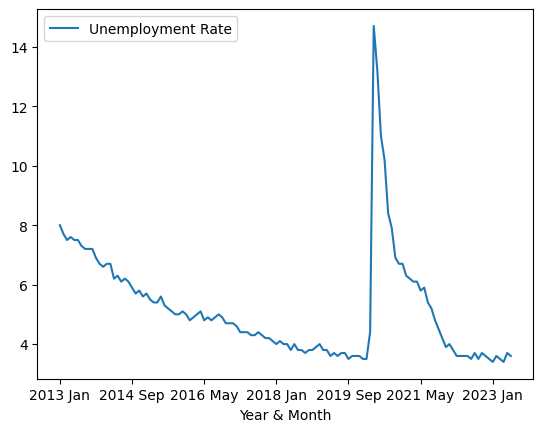

In [198]:
unemployment.plot.line()

Idk man

In [199]:
df = employed.merge(unemployment, right_index=True, left_index=True)
df

,NumberEmployed,change,Unemployment Rate
Year & Month,,,
2013 Jan,135265,<NA>,8.0
2013 Feb,135544,279,7.7
2013 Mar,135689,145,7.5
2013 Apr,135876,187,7.6
2013 May,136091,215,7.5
...,...,...,...
2023 Feb,155255,248,3.6
2023 Mar,155472,217,3.5
2023 Apr,155689,217,3.4


Some kind of big graph here

In [ ]:
#Graph time

Covid stats

In [11]:
Hospitalizations = pd.read_csv("https://github.com/Xanitross/Covid_Effects_On_Jobs/blob/main/data_table_for_weekly_covid19_hospital_admissions_-_the_united_states.csv?raw=true", skiprows=2)
Hospitalizations

,Geography,Date,Weekly COVID-19 Hospital Admissions
0,United States,Jul 8 2023,6228.0
1,United States,Jul 1 2023,6282.0
2,United States,Jun 24 2023,6277.0
3,United States,Jun 17 2023,6612.0
4,United States,Jun 10 2023,6898.0
...,...,...,...
178,United States,Feb 8 2020,NaN
179,United States,Feb 1 2020,NaN
180,United States,Jan 25 2020,NaN
181,United States,Jan 18 2020,NaN


2nd Covid stats

In [13]:
Deaths = pd.read_csv("https://github.com/Xanitross/Covid_Effects_On_Jobs/blob/main/data_table_for_weekly_deaths__the_united_states.csv?raw=true", skiprows=2)
Deaths

,Geography,Date,Weekly Deaths,Death Data As Of
0,United States,Jul 8 2023,106,Jul 12 2023
1,United States,Jul 1 2023,338,Jul 12 2023
2,United States,Jun 24 2023,468,Jul 12 2023
3,United States,Jun 17 2023,550,Jul 12 2023
4,United States,Jun 10 2023,576,Jul 12 2023
...,...,...,...,...
178,United States,Feb 8 2020,4,Jul 12 2023
179,United States,Feb 1 2020,0,Jul 12 2023
180,United States,Jan 25 2020,3,Jul 12 2023
181,United States,Jan 18 2020,2,Jul 12 2023


Begin the cleaning!

In [12]:
Hospitalizations.drop(["Geography"], axis=1, inplace=True)
Hospitalizations["Cumulitive Admissions"] = Hospitalizations["Weekly COVID-19 Hospital Admissions"].cumsum()
Hospitalizations

,Date,Weekly COVID-19 Hospital Admissions,Cumulitive Admissions
0,Jul 8 2023,6228.0,6228.0
1,Jul 1 2023,6282.0,12510.0
2,Jun 24 2023,6277.0,18787.0
3,Jun 17 2023,6612.0,25399.0
4,Jun 10 2023,6898.0,32297.0
...,...,...,...
178,Feb 8 2020,NaN,NaN
179,Feb 1 2020,NaN,NaN
180,Jan 25 2020,NaN,NaN
181,Jan 18 2020,NaN,NaN


In [14]:
Deaths.drop(["Geography", "Death Data As Of"], axis=1, inplace=True)
Deaths["Cumulitive Deaths"] = Deaths["Weekly Deaths"].cumsum()
Deaths

,Date,Weekly Deaths,Cumulitive Deaths
0,Jul 8 2023,106,106
1,Jul 1 2023,338,444
2,Jun 24 2023,468,912
3,Jun 17 2023,550,1462
4,Jun 10 2023,576,2038
...,...,...,...
178,Feb 8 2020,4,1134704
179,Feb 1 2020,0,1134704
180,Jan 25 2020,3,1134707
181,Jan 18 2020,2,1134709
